[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'^GSPC'}, xlabel='Date'>

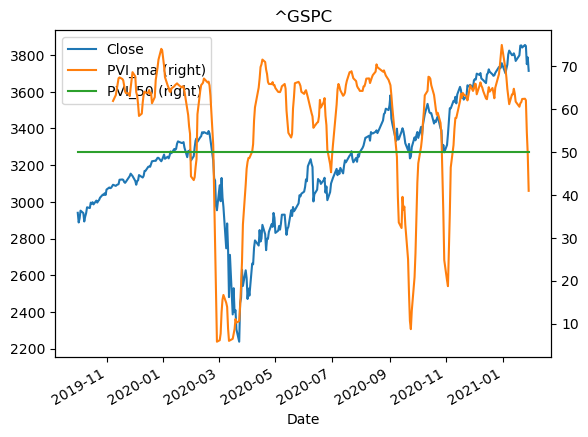

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

window=25
ticker='^GSPC'
df=yf.download(tickers= ticker,start= '2019-10-01', end='2021-2-1',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
df['pctile_price'] = df['Close'].rolling(window).rank(pct=True)
df['Volume']=df['Volume']/2
df['norm_volume'] = df['Volume']/(df['Volume'].rolling(window).median())
df['PVI']=100*df['pctile_price']/df['norm_volume']/(0.5+df['pctile_price']/df['norm_volume'])
df['PVI_ma']=df['PVI'].rolling(5).mean()
df['PVI_50']=50
df[['Close','PVI_ma','PVI_50']].plot(secondary_y=['PVI_ma','PVI_50'],title=ticker)